# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find 
out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

### Load modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
%matplotlib inline

In [2]:
#set global parameter
sns.set(style='white')
pd.set_option('precision', 4)


from matplotlib import cm
cmap = cm.get_cmap('RdGy')

### Load dataset

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

### Explore data

In [4]:
print('Training data : {}'.format(train.shape))
print('Testing data : {}'.format(test.shape))

print('\nTraining data columns :\n{}'.format(train.columns))
print('\nTesting data columns :\n{}'.format(test.columns))


Training data : (8523, 12)
Testing data : (5681, 11)

Training data columns :
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Testing data columns :
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


### Combine datasets

In [5]:
combi = pd.concat([train,test],axis = 'index')
combi.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

### Missing value Checking

In [6]:
np.sum(combi.isnull())

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

### Explore combined data

In [7]:
combi.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.0000,8523.0000,14204.0000,11765.0000,14204.0000
mean,141.0050,2181.2889,0.0660,12.7929,1997.8307
std,62.0869,1706.4996,0.0515,4.6525,8.3717
min,31.2900,33.2900,0.0000,4.5550,1985.0000
25%,94.0120,834.2474,0.0270,8.7100,1987.0000
50%,142.2470,1794.3310,0.0540,12.6000,1999.0000
75%,185.8556,3101.2964,0.0940,16.7500,2004.0000
max,266.8884,13086.9648,0.3284,21.3500,2009.0000


In [8]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [9]:
combi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.0000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


### Item_Identifier Analysis

In [10]:
# Item_Identifier  is not unique
# may give some useful insight, explore it later
combi.Item_Identifier.nunique()

1559

### Item_Fat_Content

In [11]:
# encoding required because Low Fat and LF is simliar in meaning
combi.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [12]:
# remove white spaces from both sides
combi.Item_Fat_Content.str.strip()

# replace LF with Low Fat and etc.
combi.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

# Again see the frequency count
combi.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

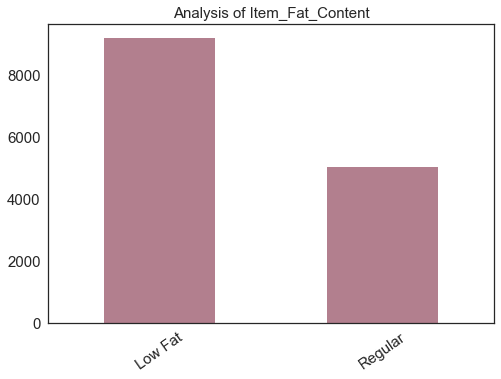

In [13]:
## Plot Item_Fat_Content

plt.figure()
combi.Item_Fat_Content.value_counts().plot.bar(grid=False,rot=35,colormap=cmap,alpha=.5,fontsize=15)
plt.title('Analysis of Item_Fat_Content',fontsize=15)
plt.show();

### Item_MRP

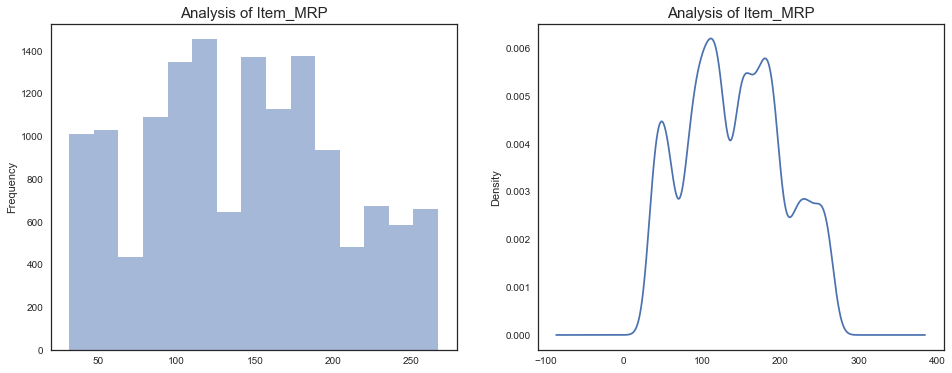

In [14]:
# distribution of Item_MRP

plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
ax1 = combi.Item_MRP.plot.hist(bins=15,alpha=.5)
ax1.set_title('Analysis of Item_MRP',fontsize=15)

plt.subplot(1,2,2)
ax2 = combi.Item_MRP.plot.density()
ax2.set_title('Analysis of Item_MRP',fontsize=15)

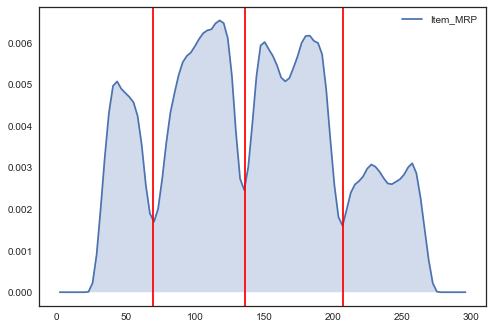

In [15]:
# explore kde or density plot little more
# As per below plot we can devide the Item_MRP into four part
ax = sns.kdeplot(combi.Item_MRP,kernel='cos',shade=True)
ax.axvline(70,c='r')
ax.axvline(136,c='r')
ax.axvline(207,c='r')

### Create New Variable 'Item_MRP_Cat'

In [16]:
def calculate_mrp(x):
    if x<=70:
        return('low')
    elif x<=136:
        return('avg')
    elif x<=207:
        return('high')
    else:
        return('very high')
    
combi['Item_MRP_Cat'] = combi.Item_MRP.agg(calculate_mrp,axis ='index')

In [17]:
combi[['Item_MRP','Item_MRP_Cat']].head()

,Item_MRP,Item_MRP_Cat
0,249.8092,very high
1,48.2692,low
2,141.6180,high
3,182.0950,high
4,53.8614,low


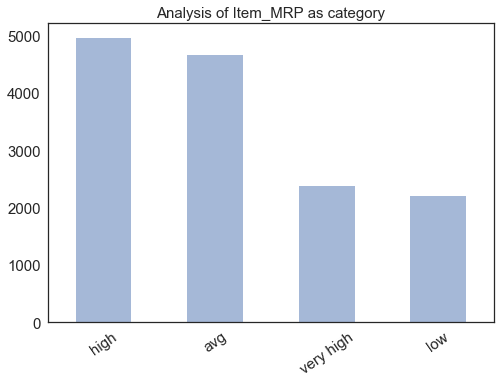

In [18]:
# frquency count for Item_MRP_Cat
combi.Item_MRP_Cat.value_counts()

# Plot for Item_MRP_Cat
ax = combi.Item_MRP_Cat.value_counts().plot.bar(rot=35,fontsize=15,alpha=.5)
ax.set_title('Analysis of Item_MRP as category',fontsize=15)

### Item_Type

In [19]:
combi.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [20]:
combi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,very high
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,low
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,high
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,high
4,Low Fat,NCD19,53.8614,994.7052,Household,0.0000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,low


### Create New Variable 'Item_Subtype' 

In [21]:
# Get the two character from Item_Identifier
combi['Item_Subtype'] = combi.Item_Identifier.str.slice(0,2)

In [22]:
combi.Item_Subtype.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Subtype, dtype: int64

In [23]:
combi.loc[combi.Item_Subtype=='DR','Item_Type'].value_counts()

Soft Drinks    726
Hard Drinks    362
Dairy          229
Name: Item_Type, dtype: int64

In [24]:
combi.loc[combi.Item_Subtype=='FD','Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Frozen Foods             1426
Baking Goods             1086
Canned                   1084
Dairy                     907
Meat                      736
Breads                    416
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [25]:
# we create new category 'Other food' 
# assign it to those who has less than 500 frequency count

combi.loc[combi.Item_Subtype=='FD','Item_Type'].value_counts()<500

combi.Item_Type.str.strip()
combi.loc[(combi.Item_Subtype=='FD') & (combi.Item_Type.isin(['Breads','Starchy Foods',\
                                                                 'Breakfast','Seafood'])),'Item_Type'] = 'Others'
combi.loc[combi.Item_Subtype=='FD','Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Frozen Foods             1426
Baking Goods             1086
Canned                   1084
Others                    960
Dairy                     907
Meat                      736
Name: Item_Type, dtype: int64

In [26]:
combi.loc[combi.Item_Subtype=='NC','Item_Type'].value_counts()

Household             1548
Health and Hygiene     858
Others                 280
Name: Item_Type, dtype: int64

In [27]:
# FD : Eatable Food , DR : Drinkable items, NC : non consumable
# Assign Others to all NC item
combi.loc[combi.Item_Subtype=='NC','Item_Type'] = 'Others'

### Item_Visibility

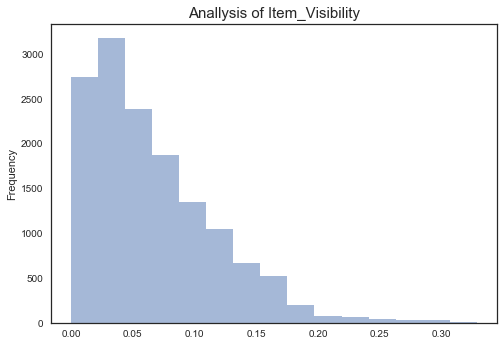

In [28]:
ax = combi.Item_Visibility.plot.hist(bins=15,alpha=0.5)
ax.set_title('Anallysis of Item_Visibility',fontsize=15)

In [29]:
# Item_Visibility cannot be zero. Hence make it null where it is zero
from numpy import nan

combi.loc[combi.Item_Visibility==0,'Item_Visibility'] = nan

In [30]:
# How many item has visibility zero
len(combi[combi.Item_Visibility.isnull()])

879

In [31]:
missingItemVisible = np.where(combi.Item_Visibility.isnull())
combi.iloc[missingItemVisible]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,NaN,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,high,FD
4,Low Fat,NCD19,53.8614,994.7052,Others,NaN,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,low,NC
5,Regular,FDP36,51.4008,556.6088,Baking Goods,NaN,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,low,FD
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,NaN,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,low,FD
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,NaN,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,very high,FD
33,Low Fat,FDO23,93.1436,2174.5028,Others,NaN,17.850,2002,OUT045,Tier 2,NaN,Supermarket Type1,avg,FD
46,Low Fat,NCP05,153.3024,2428.8384,Others,NaN,19.600,2002,OUT045,Tier 2,NaN,Supermarket Type1,high,NC
60,Low Fat,FDM20,246.9144,3185.1872,Fruits and Vegetables,NaN,10.000,2009,OUT018,Tier 3,Medium,Supermarket Type2,very high,FD
72,Low Fat,FDH35,164.7526,4604.6728,Others,NaN,18.250,2002,OUT045,Tier 2,NaN,Supermarket Type1,high,FD
79,Low Fat,FDV25,222.5456,5305.0944,Canned,NaN,5.905,2002,OUT045,Tier 2,NaN,Supermarket Type1,very high,FD


In [32]:
combi.Item_Visibility = combi.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(np.mean(x)))

In [33]:
# Look again on missing data 
combi.iloc[missingItemVisible]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,high,FD
4,Low Fat,NCD19,53.8614,994.7052,Others,0.0147,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,low,NC
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.0913,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,low,FD
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.1219,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,low,FD
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,0.1034,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,very high,FD
33,Low Fat,FDO23,93.1436,2174.5028,Others,0.1603,17.850,2002,OUT045,Tier 2,NaN,Supermarket Type1,avg,FD
46,Low Fat,NCP05,153.3024,2428.8384,Others,0.0281,19.600,2002,OUT045,Tier 2,NaN,Supermarket Type1,high,NC
60,Low Fat,FDM20,246.9144,3185.1872,Fruits and Vegetables,0.0456,10.000,2009,OUT018,Tier 3,Medium,Supermarket Type2,very high,FD
72,Low Fat,FDH35,164.7526,4604.6728,Others,0.0654,18.250,2002,OUT045,Tier 2,NaN,Supermarket Type1,high,FD
79,Low Fat,FDV25,222.5456,5305.0944,Canned,0.0500,5.905,2002,OUT045,Tier 2,NaN,Supermarket Type1,very high,FD


In [34]:
combi.loc[combi.Item_Identifier=='NCD19','Item_Visibility'].sum()

0.1320276855

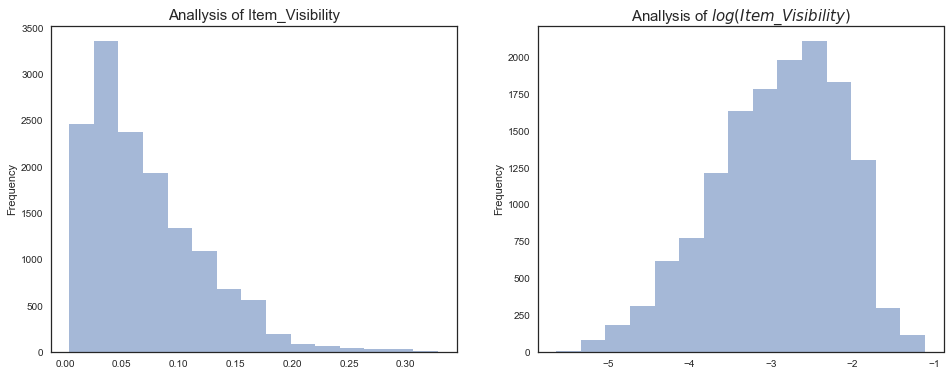

In [35]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
ax1 = combi.Item_Visibility.plot.hist(bins=15,alpha=0.5)
ax1.set_title('Anallysis of Item_Visibility',fontsize=15)

plt.subplot(1,2,2)
ax2 = (np.log(combi.Item_Visibility)).plot.hist(bins=15,alpha=0.5)
ax2.set_title('Anallysis of $log(Item\_Visibility)$',fontsize=15)

### Item_Weight

In [36]:
missingItemWeight = np.where(combi.Item_Weight.isnull())
combi.iloc[missingItemWeight]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.1275,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.0342,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,DR
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.0354,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,high,FD
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.0576,NaN,1985,OUT019,Tier 1,Small,Grocery Store,avg,FD
29,Regular,FDC14,43.6454,125.8362,Canned,0.0722,NaN,1985,OUT019,Tier 1,Small,Grocery Store,low,FD
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.0595,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.1231,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,low,FD
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.0265,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
49,Regular,FDS02,196.8794,780.3176,Dairy,0.2554,NaN,1985,OUT019,Tier 1,Small,Grocery Store,high,FD
59,Low Fat,FDI26,180.0344,892.1720,Canned,0.0611,NaN,1985,OUT019,Tier 1,Small,Grocery Store,high,FD


In [37]:
# weight of Item 'FDP10'
combi.loc[combi.Item_Identifier=='FDP10','Item_Weight'].mean()

19.0

In [38]:
combi.Item_Weight = combi.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(np.mean(x)))

In [39]:
combi.iloc[missingItemWeight]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.1275,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.0342,8.260,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,DR
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.0354,8.315,1985,OUT027,Tier 3,Medium,Supermarket Type3,high,FD
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.0576,15.500,1985,OUT019,Tier 1,Small,Grocery Store,avg,FD
29,Regular,FDC14,43.6454,125.8362,Canned,0.0722,14.500,1985,OUT019,Tier 1,Small,Grocery Store,low,FD
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.0595,20.200,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.1231,6.385,1985,OUT027,Tier 3,Medium,Supermarket Type3,low,FD
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.0265,15.250,1985,OUT027,Tier 3,Medium,Supermarket Type3,avg,FD
49,Regular,FDS02,196.8794,780.3176,Dairy,0.2554,10.195,1985,OUT019,Tier 1,Small,Grocery Store,high,FD
59,Low Fat,FDI26,180.0344,892.1720,Canned,0.0611,5.940,1985,OUT019,Tier 1,Small,Grocery Store,high,FD


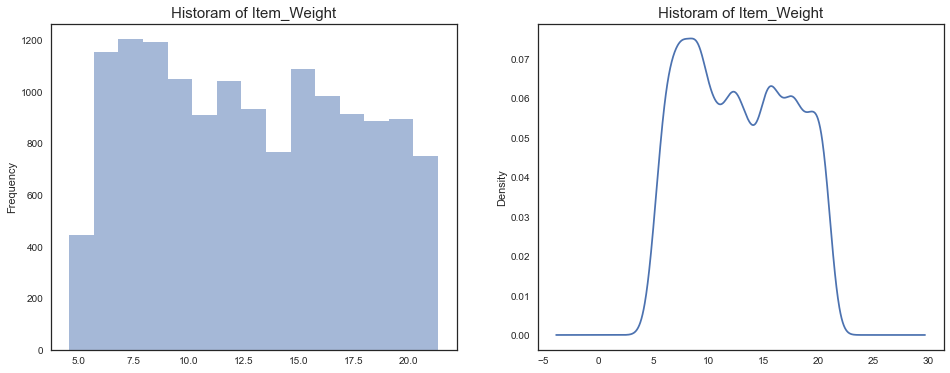

In [40]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
ax1 = combi.Item_Weight.plot.hist(bins=15,alpha=0.5)
ax1.set_title('Historam of Item_Weight',fontsize=15)

plt.subplot(1,2,2)
ax2 = combi.Item_Weight.plot.kde()
ax2.set_title('Historam of Item_Weight',fontsize=15)

### Outlet_Establishment_Year

##### Create new variable 'OutletAge'

In [41]:
combi['OutletAge'] = 2013 - combi.Outlet_Establishment_Year

In [42]:
combi.OutletAge.value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: OutletAge, dtype: int64

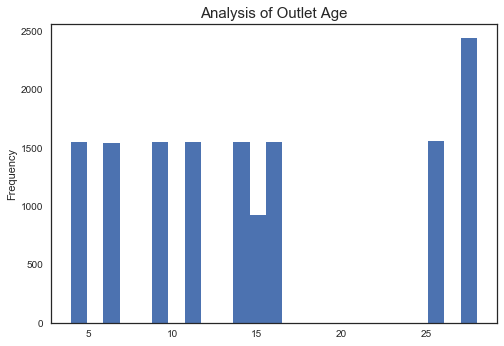

In [43]:
ax = combi.OutletAge.plot.hist(bins=25)
ax.set_title('Analysis of Outlet Age',fontsize=15)

### Outlet_Identifier

In [44]:
# There are 10 Outlets
combi.Outlet_Identifier.nunique()

10

In [45]:
combi.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

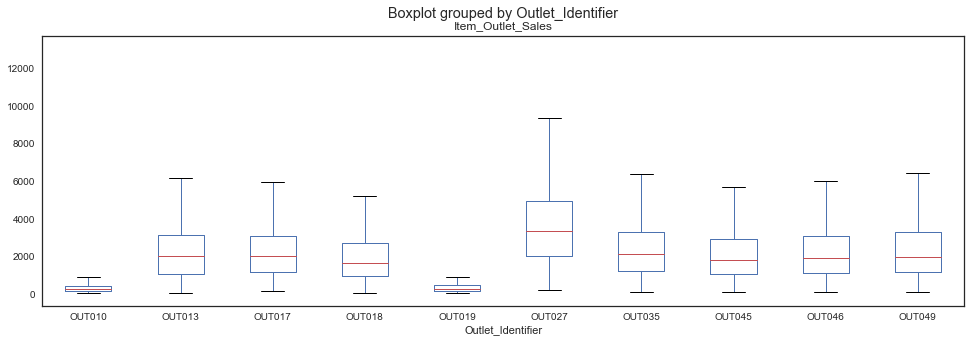

In [46]:
# Plot Item_Sales across all Outlets
# Outlet 19 and 10 has lesser sales as comparision to other outlets
# Outlets 27 has the highest sales
combi.boxplot('Item_Outlet_Sales',by='Outlet_Identifier',grid=False,figsize=(16,5))

### Outlet_Location_Type

In [47]:
combi.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

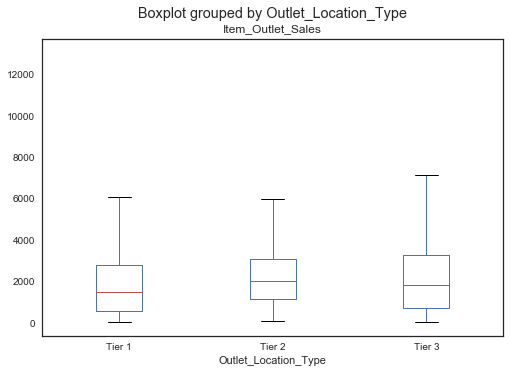

In [48]:
# Plot Outlet_Location_Type vs Item_Outlet_Sales
# Outlet in Tier1 has lesser sales 
combi.boxplot('Item_Outlet_Sales',by='Outlet_Location_Type',grid = False)

### Outlet_Type

In [49]:
combi.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

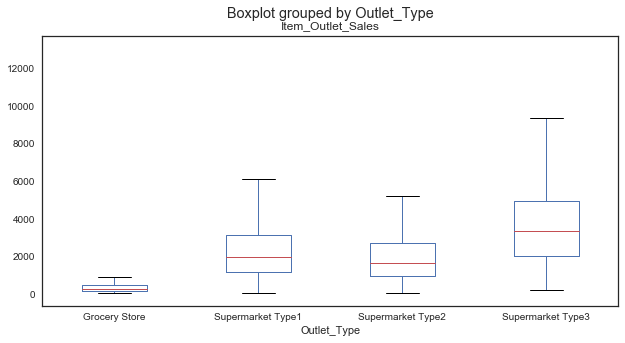

In [50]:
# Plot Outlet_Type vs Item_Outlet_Sales
# Grocery Store Outlet has lesser sales
# Supermarket Type3 has highest sales
combi.boxplot('Item_Outlet_Sales',by='Outlet_Type',grid = False,figsize=(10,5))

### Outlet_Size

In [51]:
combi.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [52]:
missingOutletSize = np.where(combi.Outlet_Size.isnull())
combi.iloc[missingOutletSize]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,high,FD,15
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.0167,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,avg,FD,11
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.0944,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,high,FD,6
25,Low Fat,NCD06,45.9060,838.9080,Others,0.0999,13.000,2007,OUT017,Tier 2,NaN,Supermarket Type1,low,NC,6
28,Regular,FDE51,45.5086,178.4344,Dairy,0.1615,5.925,1998,OUT010,Tier 3,NaN,Grocery Store,low,FD,15
30,Low Fat,FDV38,55.7956,163.7868,Dairy,0.1703,19.250,1998,OUT010,Tier 3,NaN,Grocery Store,low,FD,15
33,Low Fat,FDO23,93.1436,2174.5028,Others,0.1603,17.850,2002,OUT045,Tier 2,NaN,Supermarket Type1,avg,FD,11
45,Low Fat,FDM39,178.1002,358.2004,Dairy,0.0895,6.420,1998,OUT010,Tier 3,NaN,Grocery Store,high,FD,15
46,Low Fat,NCP05,153.3024,2428.8384,Others,0.0281,19.600,2002,OUT045,Tier 2,NaN,Supermarket Type1,high,NC,11
47,Low Fat,FDV49,265.2226,5815.0972,Canned,0.0259,10.000,2002,OUT045,Tier 2,NaN,Supermarket Type1,very high,FD,11


In [53]:
missingOutletName = combi.iloc[missingOutletSize]['Outlet_Identifier'].unique()
missingOutletName

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [54]:
combi.loc[combi.Outlet_Identifier=='OUT010','Outlet_Size'].all()
combi.loc[combi.Outlet_Identifier=='OUT045','Outlet_Size'].all()
combi.loc[combi.Outlet_Identifier=='OUT017','Outlet_Size'].all()

True

In [55]:
OutletColumns = combi.loc[:,combi.columns.str.startswith('Outlet')].columns
OutletColumns

Index(['Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'OutletAge'],
      dtype='object')

In [56]:
combi.loc[combi.Outlet_Identifier=='OUT010',['Outlet_Location_Type','Outlet_Type']].head()

,Outlet_Location_Type,Outlet_Type
3,Tier 3,Grocery Store
28,Tier 3,Grocery Store
30,Tier 3,Grocery Store
45,Tier 3,Grocery Store
65,Tier 3,Grocery Store


In [57]:
pd.pivot_table(data = combi,values='Outlet_Size',index=['Outlet_Location_Type','Outlet_Type']\
               ,aggfunc= lambda x: x.value_counts().index)

Outlet_Size
Outlet_Location_Type Outlet_Type                       
Tier 1               Grocery Store                Small
                     Supermarket Type1  [Medium, Small]
Tier 2               Supermarket Type1            Small
Tier 3               Grocery Store                   []
                     Supermarket Type1             High
                     Supermarket Type2           Medium
                     Supermarket Type3           Medium

In [58]:
combi.loc[combi.Outlet_Type=='Grocery Store','Outlet_Size'] = 'Small'
combi.loc[(combi.Outlet_Location_Type=='Tier 2'),'Outlet_Size'] = 'Small'
combi.loc[(combi.Outlet_Location_Type=='Tier 1')&(combi.Outlet_Type=='Supermarket Type1'),'Outlet_Size']='Medium'
combi.loc[(combi.Outlet_Location_Type=='Tier 3')&(combi.Outlet_Type=='Supermarket Type1'),'Outlet_Size']='High'
combi.loc[(combi.Outlet_Location_Type=='Tier 3')&(combi.Outlet_Type=='Supermarket Type2'),'Outlet_Size']='Medium'
combi.loc[(combi.Outlet_Location_Type=='Tier 3')&(combi.Outlet_Type=='Supermarket Type3'),'Outlet_Size']='High'

In [59]:
np.sum(combi.iloc[missingOutletSize].isnull())

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            1606
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Item_MRP_Cat                    0
Item_Subtype                    0
OutletAge                       0
dtype: int64

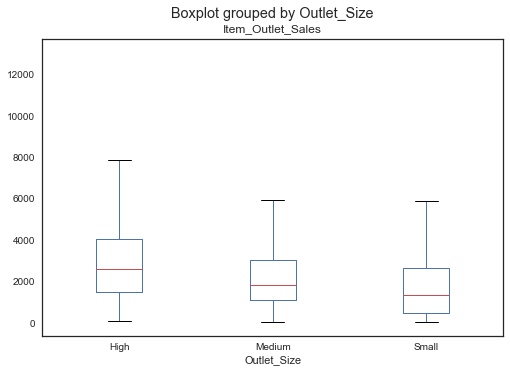

In [60]:
combi.boxplot(by='Outlet_Size',column = 'Item_Outlet_Sales',grid=False)

In [61]:
combi.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP_Cat',
       'Item_Subtype', 'OutletAge'],
      dtype='object')

In [62]:
combi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,very high,FD,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,low,DR,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,high,FD,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.20,1998,OUT010,Tier 3,Small,Grocery Store,high,FD,15
4,Low Fat,NCD19,53.8614,994.7052,Others,0.0147,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,low,NC,26


In [63]:
combi[combi.Item_Identifier=='DRA24'].head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge
1148,Regular,DRA24,164.6868,1146.5076,Soft Drinks,0.0402,19.35,2007,OUT017,Tier 2,Small,Supermarket Type1,high,DR,6
2879,Regular,DRA24,163.2868,491.3604,Soft Drinks,0.0699,19.35,1985,OUT019,Tier 1,Small,Grocery Store,high,DR,28
4130,Regular,DRA24,163.8868,327.5736,Soft Drinks,0.0668,19.35,1998,OUT010,Tier 3,Small,Grocery Store,high,DR,15
4416,Regular,DRA24,165.7868,4913.6040,Soft Drinks,0.0397,19.35,1985,OUT027,Tier 3,High,Supermarket Type3,high,DR,28
4900,Regular,DRA24,163.3868,3439.5228,Soft Drinks,0.0399,19.35,2004,OUT035,Tier 2,Small,Supermarket Type1,high,DR,9


### Create New variable 'AvgMRPOfItem'

In [64]:
combi['AvgMRPOfItem'] = combi.groupby('Item_Identifier')['Item_MRP'].transform(lambda x : np.mean(x))
combi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge,AvgMRPOfItem
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,very high,FD,14,249.5425
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,low,DR,4,48.9914
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,high,FD,14,140.0880
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.20,1998,OUT010,Tier 3,Small,Grocery Store,high,FD,15,183.3506
4,Low Fat,NCD19,53.8614,994.7052,Others,0.0147,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,low,NC,26,54.8614


## Analysis of variable with response varibale

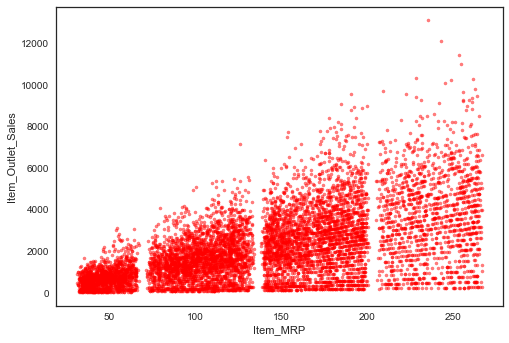

In [65]:
## Plot for Item_Outlet_Sales vs Item_MRP

combi.plot.scatter(x = 'Item_MRP',y = 'Item_Outlet_Sales',s=10,c='r',alpha=.5)

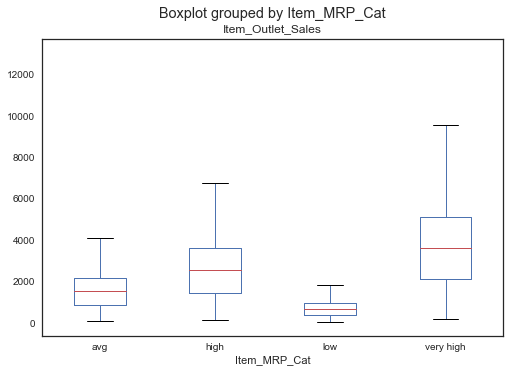

In [66]:
## Plot for Item_Outlet_Sales vs Item_MRP_Cat

combi.boxplot(by = 'Item_MRP_Cat',column = 'Item_Outlet_Sales',grid=False)

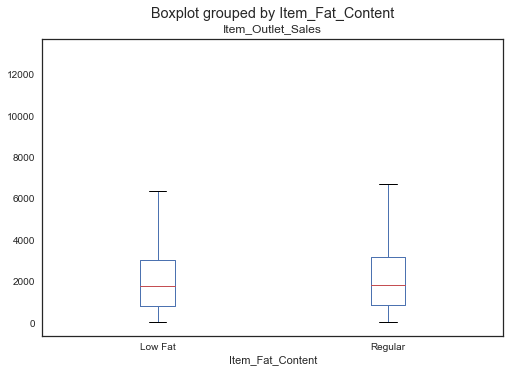

In [67]:
## Plot for Item_Outlet_Sales vs Item_Fat_Content

combi.boxplot(by = 'Item_Fat_Content',column = 'Item_Outlet_Sales',grid=False)

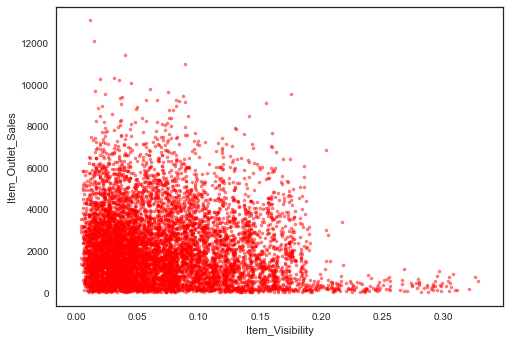

In [68]:
## Plot for Item_Outlet_Sales vs Item_Visibility

combi.plot.scatter(x = 'Item_Visibility',y = 'Item_Outlet_Sales',s=10,c='r',alpha=.5)

In [69]:
combi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge,AvgMRPOfItem
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,very high,FD,14,249.5425
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,low,DR,4,48.9914
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,high,FD,14,140.0880
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.20,1998,OUT010,Tier 3,Small,Grocery Store,high,FD,15,183.3506
4,Low Fat,NCD19,53.8614,994.7052,Others,0.0147,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,low,NC,26,54.8614


## drop unecessary features and split the data into train and test

In [70]:
newcombi = combi.drop(['Outlet_Establishment_Year'],axis ='columns')

In [71]:
newcombi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge,AvgMRPOfItem
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.0160,9.30,OUT049,Tier 1,Medium,Supermarket Type1,very high,FD,14,249.5425
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.0193,5.92,OUT018,Tier 3,Medium,Supermarket Type2,low,DR,4,48.9914
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.0168,17.50,OUT049,Tier 1,Medium,Supermarket Type1,high,FD,14,140.0880
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0229,19.20,OUT010,Tier 3,Small,Grocery Store,high,FD,15,183.3506
4,Low Fat,NCD19,53.8614,994.7052,Others,0.0147,8.93,OUT013,Tier 3,High,Supermarket Type1,low,NC,26,54.8614


## Convert variable to numerical columns

In [72]:
from sklearn.preprocessing import LabelEncoder
make_encode = LabelEncoder()

categoryCol = newcombi.select_dtypes(include=['object']).columns
categoryCol

for col in categoryCol:
    newcombi.loc[:,col] = make_encode.fit_transform(newcombi.loc[:,col])
    
newcombi.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_MRP_Cat,Item_Subtype,OutletAge,AvgMRPOfItem
0,0,156,249.8092,3735.1380,2,0.0160,9.30,9,0,1,1,3,1,14,249.5425
1,1,8,48.2692,443.4228,9,0.0193,5.92,3,2,1,2,2,0,4,48.9914
2,0,662,141.6180,2097.2700,6,0.0168,17.50,9,0,1,1,1,1,14,140.0880
3,1,1121,182.0950,732.3800,4,0.0229,19.20,0,2,2,0,1,1,15,183.3506
4,0,1297,53.8614,994.7052,7,0.0147,8.93,1,2,0,1,2,2,26,54.8614


## Remove highly correlated variable, near zero variance variable

In [73]:
# Item_MRP and AvgMRPOfItem is highly correlated
corr_df = newcombi.drop('Item_Outlet_Sales').corr().abs()
corr_df[corr_df>0.5]

newcombi.drop('AvgMRPOfItem',inplace=True,axis='columns')

newcombi.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP_Cat',
       'Item_Subtype', 'OutletAge'],
      dtype='object')

## Devide the combined data in train and test data

In [74]:
newtrain = newcombi[newcombi.Item_Outlet_Sales.notnull()]
newtest = newcombi[newcombi.Item_Outlet_Sales.isnull()]
newtest.drop('Item_Outlet_Sales',inplace=True,axis='columns')

X = newtrain.drop('Item_Outlet_Sales',axis='columns')
y = newtrain.Item_Outlet_Sales


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Feature Selection

In [75]:
from sklearn.feature_selection import  RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [76]:
rf_mod = RandomForestRegressor()
cv = ShuffleSplit(n_splits=10,test_size=.25)
rfe = RFECV(rf_mod,cv=cv,scoring='mean_squared_error',n_jobs=3).fit(X,y)

In [77]:
pd.Series(rfe.support_,index=X.columns)

Item_Fat_Content        True
Item_Identifier         True
Item_MRP                True
Item_Type               True
Item_Visibility         True
Item_Weight             True
Outlet_Identifier       True
Outlet_Location_Type    True
Outlet_Size             True
Outlet_Type             True
Item_MRP_Cat            True
Item_Subtype            True
OutletAge               True
dtype: bool

In [78]:
features = X.loc[:,rfe.support_].columns
features

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP_Cat',
       'Item_Subtype', 'OutletAge'],
      dtype='object')

## DataSets

In [79]:
X_featured = X.loc[:,features]
newtest_featured = newtest.loc[:,features]
print('Features :\n{}'.format(X_featured.columns))
print('Target Variable :\n{}'.format(y.name))

###########################################################3
## use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
newtest_scaled = scaler.fit_transform(newtest)

X_scaled_featured = scaler.fit_transform(X_featured)
newtest_scaled_featured = scaler.fit_transform(newtest_featured)
############################################################

#Dataset 1) X,y, newtest
#Dataset 2) X_featured,y,newtest_featured
#Dataset 3) X_scaled,y,newtest_scaled
#Dataset 4) X_sclaed_featured,y,newtest_scaled_featured

Features :
Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_MRP_Cat',
       'Item_Subtype', 'OutletAge'],
      dtype='object')
Target Variable :
Item_Outlet_Sales


## Create Dummy Regression (for base model)

In [80]:
from sklearn.dummy import DummyRegressor

dummy_mod = DummyRegressor(strategy='mean').fit(X,y)
predicted = dummy_mod.predict(newtest)

In [81]:
## Create and Submit CSV
# Test score : 1773.

submit_df = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})

submit_df = submit_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit_df.to_csv('dummy.csv',index=False)

## Regression Model

    - validation_curve
    - training and testing score with cross validation

In [82]:
from sklearn.model_selection import  cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
def regression_model(model,X,y):
    cv = ShuffleSplit(n_splits=5,test_size=.25)
    cross_score = cross_validate(model,X,y,cv=cv,n_jobs=3,scoring='mean_squared_error',return_train_score=True)
    print('Training cross validation score:{:.2f}'.format(np.sqrt(np.abs(cross_score['train_score'].mean()))))
    print('Testing cross validation score:{:.2f}\n'.format(np.sqrt(np.abs(cross_score['test_score'].mean()))))

In [84]:
linear_mod = LinearRegression()
ridge_mod = Ridge()
lasso_mod = Lasso()
svm_mod = SVR()
gbm_mod = GradientBoostingRegressor()
tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()

In [93]:
models_list = {
    'Linear_Regression':linear_mod,
    'Ridge_Regression':ridge_mod,
    'Lasso_Regression':lasso_mod,
    'SVM_Regressor':svm_mod,
    'GBM_Regressor':gbm_mod,
    'DecisionTree_Regressor':tree_mod,
    'Random Forest':rf_mod
    
}

for model_name,model in models_list.items():
    print(model_name)
    regression_model(model,X,y)

Linear_Regression
Training cross validation score:1199.85
Testing cross validation score:1210.18

GBM_Regressor
Training cross validation score:1026.01
Testing cross validation score:1077.57

Random Forest
Training cross validation score:496.25
Testing cross validation score:1190.33



In [94]:
## Create and Submit CSV
# Test score RMSE : 1149
predicted = gbm_mod.fit(X,y).predict(newtest)
submit_df = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})

submit_df = submit_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit_df.to_csv('gbm1.csv',index=False)

## Parameter tuning of GBM using GridSearchCV

In [92]:
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [117]:
grid_values = {
    'min_samples_leaf':[35,50,70],
    'n_estimators':[70,80,90],
    'learning_rate':[.07,.08,.09],
    'max_depth':[2,3,4]
}

In [118]:
cv = ShuffleSplit(n_splits=5,test_size=0.25)
grid_mod = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_values,
                        scoring='mean_squared_error',cv=cv,n_jobs=3,return_train_score=False)
grid_mod.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'min_samples_leaf': [35, 50, 70], 'n_estimators': [70, 80, 90], 'learning_rate': [0.07, 0.08, 0.09], 'max_depth': [2, 3, 4], 'alpha': [0.2, 0.4, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='mean_squared_error', verbose=0)

In [119]:
#mean_squared_error
print('Best Parameter :{}'.format(grid_mod.best_params_))
print('Best Score :{}'.format(np.sqrt(np.abs(grid_mod.best_score_))))

print('Best R2 :{:.2f}'.format(r2_score(y,grid_mod.predict(X))))
print('Best RMSE :{}'.format(np.sqrt(mean_squared_error(y,grid_mod.predict(X)))))

Best Parameter :{'alpha': 0.2, 'learning_rate': 0.09, 'max_depth': 2, 'min_samples_leaf': 50, 'n_estimators': 90}
Best Score :1065.9526207649435
Best R2 :0.61
Best RMSE :1062.6649241262771


In [120]:
## Create and Submit CSV
# Test score : 1150
predicted = grid_mod.predict(newtest)
submit_df = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})

submit_df = submit_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit_df.to_csv('gbm5.csv',index=False)

### Validation Curves

In [434]:
cv = ShuffleSplit(test_size=.25,n_splits=5)

In [108]:
def plot_validation_curve_for_regression(param_range,train_scores,test_scores,param_name, usage=False):
    
    if usage==True:
        print('param_range : List of values on which you want validation curve')
        print('train_scores : training scores')
        print('test_scores : testing scores')
        print('param_name : name of parameter you want validation curve')
    
    train_scores_mean = np.mean(np.sqrt(np.abs(train_scores)), axis=1)
    train_scores_std = np.std(np.sqrt(np.abs(train_scores)), axis=1)
    test_scores_mean = np.mean(np.sqrt(np.abs(test_scores)), axis=1)
    test_scores_std = np.std(np.sqrt(np.abs(test_scores)), axis=1)

    plt.plot(param_range, train_scores_mean, label="Training score",color="darkorange", lw=2)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=2)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
    plt.legend(loc="best")
    plt.title('Validation curve on : {}'.format(param_name),fontsize=15)
    plt.xlabel(param_name)
    plt.show()


In [432]:
# tune max_depth : 2
param_range_depth = np.arange(1,10,1)
train_scores_depth, test_scores_depth = validation_curve(GradientBoostingRegressor(),X,y,param_name='max_depth',
                                                         param_range=param_range_depth,scoring='mean_squared_error',n_jobs=3)

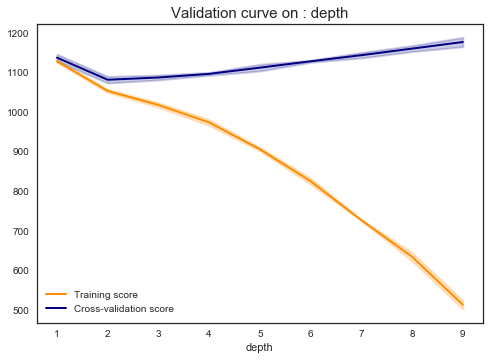

In [451]:
# max_depth =2
plot_validation_curve_for_regression(param_range_depth,train_scores_depth,test_scores_depth,'depth')

In [552]:
# tune n_estimators : 50
param_range_n =  np.arange(10,500,100)
train_scores_n, test_scores_n = validation_curve(GradientBoostingRegressor(),X,y,param_name='n_estimators',
                                                 param_range=param_range_n,scoring='mean_squared_error',n_jobs=3)

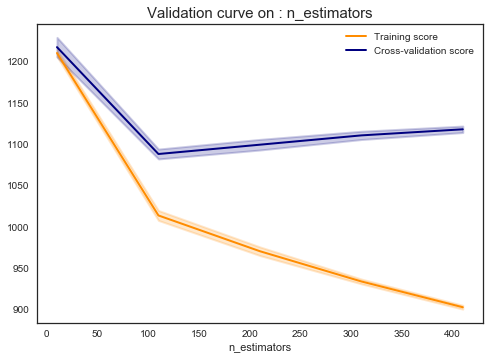

()

In [553]:
plot_validation_curve_for_regression(param_range_n,train_scores_n,test_scores_n,'n_estimators')

In [450]:
# tune learning_rate : .01
param_range_rate =  [.1,.01,.001,.0001]
train_scores_rate, test_scores_rate = validation_curve(GradientBoostingRegressor(),X,y,param_name='learning_rate',
                                                       param_range=param_range_rate,scoring='mean_squared_error',n_jobs=3)

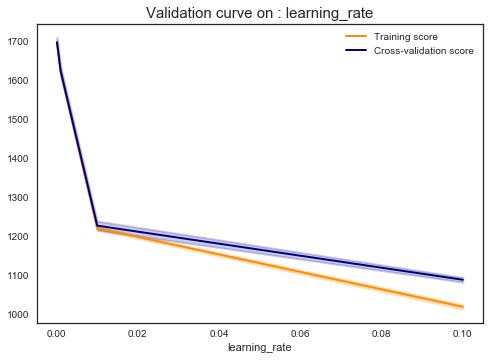

In [475]:
plot_validation_curve_for_regression(param_range_rate,train_scores_rate,test_scores_rate,'learning_rate')

In [481]:
# tune min_samples_leaf : 250
param_range_leaf =  np.arange(50,1000,50)
train_scores_leaf, test_scores_leaf = validation_curve(GradientBoostingRegressor(),X,y,param_name='min_samples_leaf',
                                                       param_range=param_range_leaf,scoring='mean_squared_error',n_jobs=3)

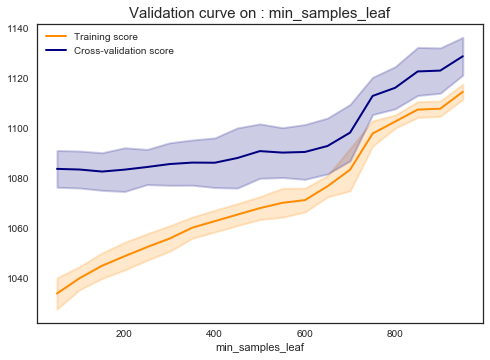

()

In [482]:
plot_validation_curve_for_regression(param_range_leaf,train_scores_leaf,test_scores_leaf,'min_samples_leaf')

## Parameter tuning of Random Forest using GridSearchCV

In [144]:
grid_rf = {
    'max_depth':np.arange(3,10,1),
    'min_samples_leaf':np.arange(50,100,10),
    'n_estimators':[30,50,70],
    'min_samples_split':[25,40]
}

cv = ShuffleSplit(n_splits=5,test_size=.25)

In [145]:
grid_mod_rf = GridSearchCV(RandomForestRegressor(),cv=cv,param_grid=grid_rf,scoring='mean_squared_error',n_jobs=3)
grid_mod_rf.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([50, 60, 70, 80, 90]), 'n_estimators': [30, 50, 70], 'min_samples_split': [25, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [146]:
#mean_squared_error
print('Best Parameter :{}'.format(grid_mod_rf.best_params_))
#print('Best Score :{}'.format(np.sqrt(np.abs(grid_mod.best_score_))))
print('Best Score :{}'.format(np.sqrt(np.abs(grid_mod_rf.best_score_))))

print('Best R2 :{:.2f}'.format(r2_score(y,grid_mod_rf.predict(X))))
print('Best RMSE :{}'.format(np.sqrt(mean_squared_error(y,grid_mod_rf.predict(X)))))

Best Parameter :{'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 50}
Best Score :1084.0756329046817
Best R2 :0.61
Best RMSE :1060.6704614515336


## Check for Overfitting

In [131]:
# tune min_samples_leaf
min_samples_rf_leaf = np.arange(50,200,10)
train_scores_rf_leaf, test_scores_rf_leaf = validation_curve(RandomForestRegressor(),X,y,param_name='min_samples_leaf',
                                                       param_range=min_samples_rf_leaf,scoring='mean_squared_error',n_jobs=3)

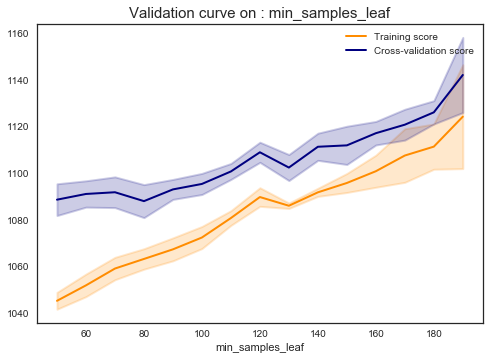

In [132]:
plot_validation_curve_for_regression(min_samples_rf_leaf,train_scores_rf_leaf,test_scores_rf_leaf,'min_samples_leaf')

In [147]:
## Create and Submit CSV
# Test score : 1151
predicted = grid_mod_rf.predict(newtest)
submit_df = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})

submit_df = submit_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit_df.to_csv('rf1.csv',index=False)

## XGBoost

In [174]:
import xgboost as xgb

In [170]:
param_xgb = {
    'max_depth':np.arange(2,9,1),
    'learning_rate':np.arange(.01,.3,.1),
    'reg_lambda':np.arange(1,5,1)
}

In [171]:
grid_xgb = GridSearchCV(xgb.XGBRegressor(),cv=cv,param_grid=param_xgb,n_jobs=3).fit(X,y)

In [172]:
#mean_squared_error
print('Best Parameter :{}'.format(grid_xgb.best_params_))
print('Best Score :{}'.format(np.sqrt(np.abs(grid_xgb.best_score_))))

print('Best R2 :{:.2f}'.format(r2_score(y,grid_xgb.predict(X))))
print('Best RMSE :{}'.format(np.sqrt(mean_squared_error(y,grid_xgb.predict(X)))))

Best Parameter :{'learning_rate': 0.11, 'max_depth': 2, 'reg_lambda': 4}
Best Score :0.7725136782311912
Best R2 :0.62
Best RMSE :1058.526054998513


In [173]:
## Create and Submit CSV
# Test score : 1151
predicted = grid_xgb.predict(newtest)
submit_df = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':predicted})

submit_df = submit_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submit_df.to_csv('xgb.csv',index=False)